# Dataset imputations
## First we will impute the rock chip samples and assign the values to the hydraulic unit basins

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import geopandas as gpd
import glob
from tqdm import tqdm

%matplotlib inline
import statsmodels as sm
from statsmodels.imputation import mice

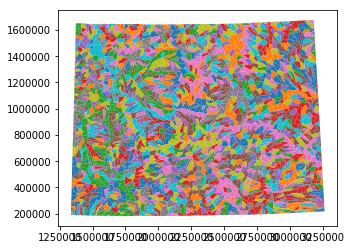

In [2]:
huc12 = gpd.read_file(
    r"J:\Geology\WSGS\GIS\huc_12.shp"
)  # reads in the hydraulic basin units and adds an area column
huc12 = huc12.to_crs({"init": "epsg:3732"})
huc12.plot(column="HU_12_NAME", figsize=(5, 5))

In [3]:
ref = pd.read_csv(
    r"J:\Geology\WSGS\Projects\Critical Minerals\ngdbrock-fUS56\tblRockGeoData.csv",
    index_col=[0],
)
path = r"J:\\Geology\\WSGS\\Projects\\Critical Minerals\\ngdbrock-fUS56\\ngdbrock-fUS56\\"
allFiles = glob.glob(path + "*.csv")
analysis = pd.DataFrame
moving = []
for file in allFiles:
    types = pd.read_csv(file)
    moving.append(types)
analysis = pd.concat(moving, sort=False)


merged = ref.merge(analysis, on="lab_id")
merged.drop(
    columns=["br_ppm", "ir_ppm", "rn_ppm", "i_ppm", "ir_ppb", "au_ppb"],
    inplace=True,
)
merged["tracking"] = np.arange(0, len(merged))

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (12,14,26,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
ref = pd.read_csv(
    r"J:\Geology\WSGS\Projects\Critical Minerals\ngdbrock-fUS56\tblRockGeoData.csv",
    index_col=[0],
)
path = r"J:\\Geology\\WSGS\\Projects\\Critical Minerals\\ngdbrock-fUS56\\ngdbrock-fUS56\\"
allFiles = glob.glob(path + "*.csv")
analysis = pd.DataFrame
moving = []
for file in allFiles:
    types = pd.read_csv(file)
    moving.append(types)
analysis = pd.concat(moving, sort=False)


merged = ref.merge(analysis, on="lab_id")
merged.drop(
    columns=["br_ppm", "ir_ppm", "rn_ppm", "i_ppm", "ir_ppb", "au_ppb"],
    inplace=True,
)
merged["tracking"] = np.arange(0, len(merged))

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (12,14,26,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
imp = sm.imputation.mice.MICEData(
    merged.iloc[:, 32:-3], perturbation_method="gaussian", k_pmm=2
)
for j in tqdm(range(200)):
    imp.update_all()
    if j % 10 == 0:
        print(j)
        # imp.data.to_csv('D:\yep'+str(j)+'.csv')
    else:
        pass

In [5]:
imputed_merged = merged[
    [
        "lab_id",
        "job_id",
        "submitter",
        "date_sub",
        "date_sub2",
        "field_id",
        "state",
        "country",
        "datum",
        "spheroid",
        "latitude",
        "longitude",
        "depth",
        "locat_desc",
        "datecollct",
        "sample_src",
        "methcollct",
        "primeclass",
        "xndryclass",
        "spec_name",
        "addl_attr",
        "geol_age",
        "stratgrphy",
        "mineralztn",
        "alteration",
        "struct_src",
        "dep_envirn",
        "source_rk",
        "metamrphsm",
        "facies_grd",
        "prep",
        "mesh_size",
        "tracking",
    ]
].merge(imp.data, on="tracking")
# imputed_merged.to_csv(r'J:\Geology\WSGS\Projects\Critical Minerals\ngdbrock-fUS56\imputed_rock_values.csv')

NameError: name 'imp' is not defined

In [2]:
imputed_merged = pd.read_csv(
    r"J:\Geology\WSGS\Projects\Critical Minerals\ngdbrock-fUS56\imputed_rock_values.csv"
)

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,9,10,13,14,15,21,27,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


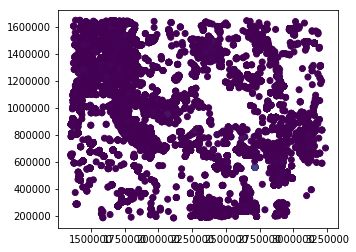

In [7]:
from geopandas import GeoDataFrame
from shapely.geometry import Point
import fiona

# writes the point data to a shapefile in the dir called data.shp
geometry = [
    Point(xy) for xy in zip(imputed_merged.longitude, imputed_merged.latitude)
]
crs = {"init": "epsg:3732"}  # http://www.spatialreference.org/ref/epsg/2263/
geo_df = GeoDataFrame(
    imputed_merged, crs={"init": "epsg:4326"}, geometry=geometry
)
projGeoDF = geo_df.to_crs(crs)
projGeoDF.plot(column="co_ppm")

In [ ]:
points_with_basin = gpd.sjoin(huc12, projGeoDF, how="inner", op="intersects")
maximal = points_with_basin.dissolve(by="HUC_12", aggfunc="max")
maximal = maximal.drop(
    columns=[
        "AREA",
        "PERIMETER",
        "WY_HU12_",
        "WY_HU12_ID",
        "HUC_8",
        "HUC_10",
        "ACRES",
        "STATES",
        "NCONTRB_A",
        "HU_10_DS",
        "HU_10_NAME",
        "HU_10_MOD",
        "HU_10_TYPE",
        "HU_12_DS",
        "HU_12_NAME",
        "HU_12_MOD",
        "HU_12_TYPE",
        "HU_2_NAME",
        "HU_4_NAME",
        "HU_6_NAME",
        "HU_8_NAME",
        "Shape_Leng",
        "Shape_Area",
        "index_right",
    ]
)
# maximal.to_file(driver='ESRI Shapefile', filename='max_rock_values.shp')

## This next section deals with imputation of the sediment sample data

In [ ]:
nure = pd.read_csv(r"M:\critical\nure.csv", encoding="iso-8859-1")

In [ ]:
dataColumns = [
    "u_dn_ppm",
    "u_fl_ppm",
    "ag_ppm",
    "al_pct",
    "as_ppm",
    "au_ppm",
    "b_ppm",
    "ba_ppm",
    "be_ppm",
    "bi_ppm",
    "ca_pct",
    "cd_ppm",
    "ce_ppm",
    "cl_ppm",
    "co_ppm",
    "cr_ppm",
    "cs_ppm",
    "cu_ppm",
    "dy_ppm",
    "eu_ppm",
    "fe_pct",
    "hf_ppm",
    "k_pct",
    "la_ppm",
    "li_ppm",
    "lu_ppm",
    "mg_pct",
    "mn_ppm",
    "mo_ppm",
    "na_pct",
    "nb_ppm",
    "ni_ppm",
    "p_ppm",
    "pb_ppm",
    "rb_ppm",
    "sb_ppm",
    "sc_ppm",
    "se_ppm",
    "sm_ppm",
    "sn_ppm",
    "sr_ppm",
    "ta_ppm",
    "tb_ppm",
    "th_ppm",
    "ti_ppm",
    "v_ppm",
    "w_ppm",
    "y_ppm",
    "yb_ppm",
    "zn_ppm",
    "zr_ppm",
]

In [ ]:
imp = sm.imputation.mice.MICEData(nure[dataColumns])
for j in tqdm(range(200)):
    imp.update_all()
    if j % 10 == 0:
        print(j)
        # imp.data.to_csv('D:\yep'+str(j)+'.csv')
    else:
        pass
# imp.to_csv(r'J:\Geology\WSGS\Projects\Critical Minerals\imputed_nure_values.csv')

In [5]:
df = pd.read_csv(
    r"J:\Geology\WSGS\Projects\Critical Minerals\imputed.csv"
)  # reads in the point data
from geopandas import GeoDataFrame
from shapely.geometry import Point
import fiona

# writes the point data to a shapefile in the dir called data.shp
geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]
crs = {"init": "epsg:4326"}
geo_df = GeoDataFrame(df, crs={"init": "epsg:4326"}, geometry=geometry)

geo_df.to_file(driver="ESRI Shapefile", filename="data.shp")
projGeoDF = geo_df.to_crs(crs)

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\geopandas\io\file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():
CPLE_NotSupported in driver ESRI Shapefile does not support creation option ENCODING
CPLE_NotSupported in Normalized/laundered field name: 'Unnamed: 0' to 'Unnamed_ 0'


In [ ]:
points_with_basin = gpd.sjoin(huc12, projGeoDF, how="inner", op="intersects")
maximal = points_with_basin.dissolve(by="HUC_12", aggfunc="max")
maximal = maximal.drop(
    columns=[
        "AREA",
        "PERIMETER",
        "WY_HU12_",
        "WY_HU12_ID",
        "HUC_8",
        "HUC_10",
        "ACRES",
        "STATES",
        "NCONTRB_A",
        "HU_10_DS",
        "HU_10_NAME",
        "HU_10_MOD",
        "HU_10_TYPE",
        "HU_12_DS",
        "HU_12_NAME",
        "HU_12_MOD",
        "HU_12_TYPE",
        "HU_2_NAME",
        "HU_4_NAME",
        "HU_6_NAME",
        "HU_8_NAME",
        "Shape_Leng",
        "Shape_Area",
        "index_right",
        "Unnamed: 0",
    ]
)
maximal.to_file(driver="ESRI Shapefile", filename="max_nure_values.shp")